# MODELLING THE CLASSIFICATION AND PREDICTION OF BREAST CANCER IN PATIENTS

This model predicts and classifies a mammographic mass as either benign or malignant and assigns a BI-RADS assessment
score(An assessment of the confidence of the severity of the classification given on an scale of 1-5.)
This is in itself a non-predictive attribute.

This data contains 961 instances of masses detected in mammograms from the public dataset from the UCI repository (source: https://archive.ics.uci.edu/ml/datasets/Mammographic+Mass), and contains the following attributes:


BI-RADS assessment: 1 to 5 (ordinal)

Age: patient's age in years (integer)

Shape: mass shape: round=1 oval=2 lobular=3 irregular=4 (nominal)

Margin: mass margin: circumscribed=1 microlobulated=2 obscured=3 ill-defined=4 spiculated=5 (nominal)

Density: mass density high=1 iso=2 low=3 fat-containing=4 (ordinal)

Severity: benign=0 or malignant=1 (binominal)

# PRELIMINARY ANALYSIS OF THE DATA

In [3]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

df = pd.read_csv("mammographic_masses.data") #reading and passing the data into a pandas dataframe
df.head() # displaying the first 5 rows of the data available

,5,67,3,5.1,3.1,1
0,4,43,1,1,?,1
1,5,58,4,5,3,1
2,4,28,1,1,3,0
3,5,74,1,5,?,1
4,4,65,1,?,3,0


The public dataset awards us with two files, "mammographic_masses.data" which contains the data for this assessment and "mammographic_masses.names", a text file which indicates the respective column names of the dataset. I will now create a list containing these attribute names.

From a mere inspection cells are seen to contain the values "?", these are not numeric values and will subsequently be treated Na values.

In [4]:
attribute_names = ['BI-RADS', 'AGE', 'SHAPE', 'MARGIN', 'DENSITY', 'SEVERITY']
df = pd.read_csv("mammographic_masses.data", na_values = '?', names = attribute_names )
df.head()

,BI-RADS,AGE,SHAPE,MARGIN,DENSITY,SEVERITY
0,5.0,67.0,3.0,5.0,3.0,1
1,4.0,43.0,1.0,1.0,NaN,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
4,5.0,74.0,1.0,5.0,NaN,1


# DATA CLEANING

To get a better picture of the data, now captured in our dataframe we need to brief overview of the dataframe itself. The number of NaN values and the distribution of these NaN values so as to determine to method of handling to be used.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BI-RADS   959 non-null    float64
 1   AGE       956 non-null    float64
 2   SHAPE     930 non-null    float64
 3   MARGIN    913 non-null    float64
 4   DENSITY   885 non-null    float64
 5   SEVERITY  961 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 45.2 KB


From the summary above, it is seen that the dataset is not imbalance by the number of null values present (Out of 961 entries the least number of non-null values in our dataframe is 885 (about 92% of the original dataset) , however the distribution of the null values is unknown an inorder to avoid introducing bias into the system, more has to be known about the dataframe.

In [6]:
df.describe()

,BI-RADS,AGE,SHAPE,MARGIN,DENSITY,SEVERITY
count,959.000000,956.000000,930.000000,913.000000,885.000000,961.000000
mean,4.348279,55.487448,2.721505,2.796276,2.910734,0.463059
std,1.783031,14.480131,1.242792,1.566546,0.380444,0.498893
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,45.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


In [7]:
NaN = df[df.isna().any(axis = 1)]
print(NaN)

     BI-RADS   AGE  SHAPE  MARGIN  DENSITY  SEVERITY
1        4.0  43.0    1.0     1.0      NaN         1
4        5.0  74.0    1.0     5.0      NaN         1
5        4.0  65.0    1.0     NaN      3.0         0
6        4.0  70.0    NaN     NaN      3.0         0
7        5.0  42.0    1.0     NaN      3.0         0
..       ...   ...    ...     ...      ...       ...
778      4.0  60.0    NaN     4.0      3.0         0
819      4.0  35.0    3.0     NaN      2.0         0
824      6.0  40.0    NaN     3.0      4.0         1
884      5.0   NaN    4.0     4.0      3.0         1
923      5.0   NaN    4.0     3.0      3.0         1

[131 rows x 6 columns]


There appears to be no correlation between the position of NaN values in our dataset, and neither do the NaN values form a large percentage of our dataset. Subsequently, these rows can be dropped.

In [8]:
df.dropna(inplace = True)
df.head()

,BI-RADS,AGE,SHAPE,MARGIN,DENSITY,SEVERITY
0,5.0,67.0,3.0,5.0,3.0,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
8,5.0,57.0,1.0,5.0,3.0,1
10,5.0,76.0,1.0,4.0,3.0,1


To make manipulation of our models easier, the BI-RADS column should be hot-encoded.

In [9]:
df2 = pd.get_dummies(df['BI-RADS'], prefix='BI-RADS')
df2 = pd.DataFrame(df2)
df2.dropna(inplace = True)
df = pd.concat([df,df2], axis = 1, sort = False, join = "inner").dropna(axis = 0)
df.head()

,BI-RADS,AGE,SHAPE,MARGIN,DENSITY,SEVERITY,BI-RADS_0.0,BI-RADS_2.0,BI-RADS_3.0,BI-RADS_4.0,BI-RADS_5.0,BI-RADS_6.0,BI-RADS_55.0
0,5.0,67.0,3.0,5.0,3.0,1,0,0,0,0,1,0,0
2,5.0,58.0,4.0,5.0,3.0,1,0,0,0,0,1,0,0
3,4.0,28.0,1.0,1.0,3.0,0,0,0,0,1,0,0,0
8,5.0,57.0,1.0,5.0,3.0,1,0,0,0,0,1,0,0
10,5.0,76.0,1.0,4.0,3.0,1,0,0,0,0,1,0,0


# DATA VISUALIZATION AND ANALYSIS

Firstly, the distribution of this data set should be visualized as it provides more insight into our existing dataframe.

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


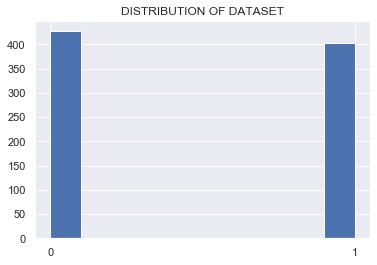

In [10]:
plt.hist(df['SEVERITY'])
plt.title("DISTRIBUTION OF DATASET")
axes = plt.axes()
axes.set_xticks([0,1])
plt.show()



Our dataset is relatively evenly distributed as shown by the histogram plotted above. Next correlations between various attributes will be visualized if any exist as well as the distribution of other attributes in the dataset.

In [11]:
rel = df[['BI-RADS', 'AGE', 'SHAPE', 'MARGIN', 'DENSITY', 'SEVERITY']]
corr = rel.corr()

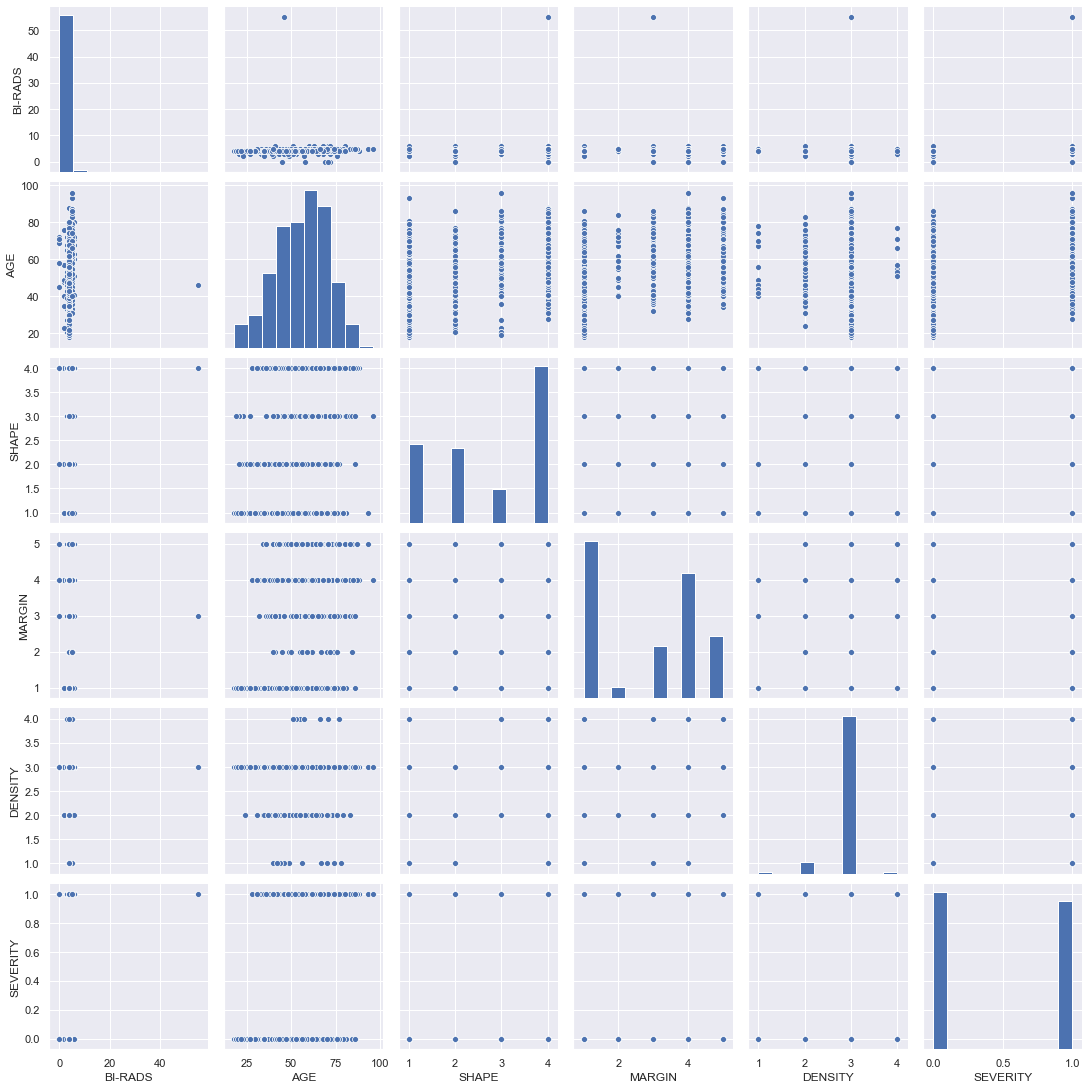

In [12]:
sns.pairplot(rel)

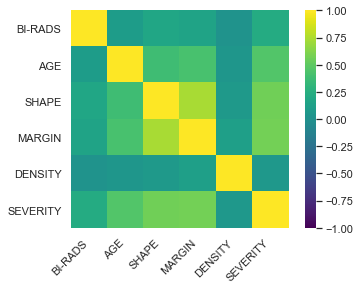

In [13]:
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap='viridis',
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

For datasets in multiple dimensions, a PCA is used to reduce the number of applicable dimensions. In this dataset, the number of attributes i.e. dimensions exists in 4 dimensions so it could be used as it is. 
However, a PCA shall still be applied and analyzed in the given dataset.

# PRINCIPAL COMPONENT ANALYSIS/ REDUCTION OF DIMENSIONALITY

In [14]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

features = df[['AGE', 'SHAPE', 'MARGIN', 'DENSITY']].dropna()
features.head()

feature_values = features.values
feature_values = scale.fit_transform(feature_values)

pca = PCA(n_components = 2, whiten = True).fit(feature_values)
features_pca = pca.transform(feature_values)


By doing so, we have managed to scale our 4 dimensional data (Age, Shape, Margin, Density) down to two dimension. We shall now run a variance ratio to see how much information we are able to preserve by doing so.


In [15]:
Score = sum(pca.explained_variance_ratio_)
print(Score)

0.7620261007963499


In scaling our data down to 2 dimensions we have managed to preserve 76.19% percent of information required. Subsequently, we shall process using these 4 dimensions instead.

# MODELLING

With our given dataset, it is easy to discard the BI-RADS Assessment as the BI-RADS is not a predictive attribute but rather a measure of confidence of our assessment on the nature of mass. 

However, with by treating this as a combination of Binary Classification problem in the case of (Malignant or Benign), this can be achieved.

# DATA NORMALIZATION

Firstly, to ensure our models are trained to work as expected, all input variables must be normalized as such we shall make use of the normalized feature data above.

# MULTI-LAYER PERCEPTRON MODEL

Necessary imports from the tensorflow package are made. A multi-layer perceptron model is chosen as opposed to other binary classification problems because this is in itself a mult-label classification problem.

In [25]:
from skmultilearn.model_selection import iterative_train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv1D, MaxPooling1D

y = df[['BI-RADS_0.0','BI-RADS_2.0','BI-RADS_3.0','BI-RADS_4.0','BI-RADS_5.0','BI-RADS_6.0']].values #label data is chosen
X_train, y_train, X_test, y_test = iterative_train_test_split(feature_values, y, test_size = 0.5) #an iterative train split is used for the multi-label classification problem
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))#data is reshaped to make it compatible for the CONV1D
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))#data is reshaped to make it compatible for the CONV1D



# NEURAL NETWORK

A sequential model was chosen using a CNN. Typically CNNs (Convoluted Neural Networks) are used for image data but for this problem I deemed it more appropriate than a Recurrent Neural Network. CNNs accept 3d input data so the data had to be resized appropriately for this problem.

A final sigmoid layer was chosen opposed to a softmax layer because the individual probabilities are independent of one another as opposed to a softmax layer.

In [29]:
model = Sequential()
model.add(Conv1D(filters=4, kernel_size=(1), activation="relu", input_shape=(1,4)))
model.add(Dropout(0.25))
model.add(Conv1D(filters=32, kernel_size=(1), activation='relu'))
model.add(Dropout(0.25))
model.add(Conv1D(filters=64, kernel_size=(1), activation="relu"))
model.add(Dropout(0.25))
model.add(Conv1D(filters=64, kernel_size=(1), activation='relu'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(6, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])




# MODEL SUMMARY

In [30]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_12 (Conv1D)           (None, 1, 4)              20        
_________________________________________________________________
dropout_18 (Dropout)         (None, 1, 4)              0         
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 1, 32)             160       
_________________________________________________________________
dropout_19 (Dropout)         (None, 1, 32)             0         
_________________________________________________________________
conv1d_14 (Conv1D)           (None, 1, 64)             2112      
_________________________________________________________________
dropout_20 (Dropout)         (None, 1, 64)             0         
_________________________________________________________________
conv1d_15 (Conv1D)           (None, 1, 64)            

In [31]:
model.fit(X_train, y_train, epochs = 100, validation_data = (X_test,y_test), batch_size = 64)

Train on 415 samples, validate on 415 samples
Epoch 1/100
415/415 [==============================] - 2s 5ms/sample - loss: 0.6766 - accuracy: 0.6695 - val_loss: 0.6516 - val_accuracy: 0.8341
Epoch 2/100
415/415 [==============================] - 0s 319us/sample - loss: 0.6242 - accuracy: 0.7956 - val_loss: 0.5878 - val_accuracy: 0.8337
Epoch 3/100
415/415 [==============================] - 0s 319us/sample - loss: 0.5461 - accuracy: 0.8285 - val_loss: 0.4856 - val_accuracy: 0.8337
Epoch 4/100
415/415 [==============================] - 0s 318us/sample - loss: 0.4592 - accuracy: 0.8173 - val_loss: 0.3740 - val_accuracy: 0.8337
Epoch 5/100
415/415 [==============================] - 0s 313us/sample - loss: 0.3965 - accuracy: 0.8257 - val_loss: 0.3075 - val_accuracy: 0.8337
Epoch 6/100
415/415 [==============================] - 0s 310us/sample - loss: 0.3812 - accuracy: 0.8277 - val_loss: 0.2864 - val_accuracy: 0.8582
Epoch 7/100
415/415 [==============================] - 0s 316us/sample - l

415/415 [==============================] - 0s 422us/sample - loss: 0.2389 - accuracy: 0.9036 - val_loss: 0.2161 - val_accuracy: 0.9141
Epoch 57/100
415/415 [==============================] - 0s 358us/sample - loss: 0.2502 - accuracy: 0.9016 - val_loss: 0.2151 - val_accuracy: 0.9137
Epoch 58/100
415/415 [==============================] - 0s 384us/sample - loss: 0.2384 - accuracy: 0.8968 - val_loss: 0.2167 - val_accuracy: 0.9133
Epoch 59/100
415/415 [==============================] - 0s 380us/sample - loss: 0.2336 - accuracy: 0.9072 - val_loss: 0.2160 - val_accuracy: 0.9129
Epoch 60/100
415/415 [==============================] - 0s 386us/sample - loss: 0.2480 - accuracy: 0.8952 - val_loss: 0.2166 - val_accuracy: 0.9120
Epoch 61/100
415/415 [==============================] - 0s 390us/sample - loss: 0.2361 - accuracy: 0.8980 - val_loss: 0.2164 - val_accuracy: 0.9129
Epoch 62/100
415/415 [==============================] - 0s 380us/sample - loss: 0.2437 - accuracy: 0.8980 - val_loss: 0.2154 

Using a training data and our test data as validation data our CNN model was trained. With 100 epochs and a batch size of 64 we have a resulting accuracy of about 91.12%.

Now that the first neural network is set up we can now work on a second neural network to classify the tumor itself on basis of severity

In [42]:
model_2 = Sequential()
model_2.add(Dense(6, input_dim=4, kernel_initializer='normal', activation='relu'))
model_2.add(Dense(4, kernel_initializer='normal', activation='relu'))
model_2.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
model_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [45]:
from sklearn.model_selection import train_test_split
y_2 = df['SEVERITY'].values
X_train2, X_test2, y_train2, y_test2 = train_test_split(feature_values, y_2, test_size = 0.5)
model_2.fit(X_train2, y_train2, epochs = 100, validation_data = (X_test2,y_test2), batch_size = 64)

Train on 415 samples, validate on 415 samples
Epoch 1/100
415/415 [==============================] - 0s 260us/sample - loss: 0.4530 - accuracy: 0.8096 - val_loss: 0.4503 - val_accuracy: 0.7976
Epoch 2/100
415/415 [==============================] - 0s 158us/sample - loss: 0.4521 - accuracy: 0.8096 - val_loss: 0.4505 - val_accuracy: 0.7952
Epoch 3/100
415/415 [==============================] - 0s 147us/sample - loss: 0.4506 - accuracy: 0.8096 - val_loss: 0.4508 - val_accuracy: 0.7952
Epoch 4/100
415/415 [==============================] - 0s 158us/sample - loss: 0.4492 - accuracy: 0.8145 - val_loss: 0.4513 - val_accuracy: 0.7952
Epoch 5/100
415/415 [==============================] - 0s 148us/sample - loss: 0.4480 - accuracy: 0.8169 - val_loss: 0.4518 - val_accuracy: 0.7952
Epoch 6/100
415/415 [==============================] - 0s 163us/sample - loss: 0.4471 - accuracy: 0.8169 - val_loss: 0.4522 - val_accuracy: 0.7952
Epoch 7/100
415/415 [==============================] - 0s 158us/sample -

415/415 [==============================] - 0s 147us/sample - loss: 0.4352 - accuracy: 0.8217 - val_loss: 0.4637 - val_accuracy: 0.7976
Epoch 57/100
415/415 [==============================] - 0s 148us/sample - loss: 0.4352 - accuracy: 0.8217 - val_loss: 0.4638 - val_accuracy: 0.7976
Epoch 58/100
415/415 [==============================] - 0s 146us/sample - loss: 0.4351 - accuracy: 0.8217 - val_loss: 0.4639 - val_accuracy: 0.7952
Epoch 59/100
415/415 [==============================] - 0s 135us/sample - loss: 0.4351 - accuracy: 0.8217 - val_loss: 0.4637 - val_accuracy: 0.7952
Epoch 60/100
415/415 [==============================] - 0s 134us/sample - loss: 0.4350 - accuracy: 0.8241 - val_loss: 0.4638 - val_accuracy: 0.7952
Epoch 61/100
415/415 [==============================] - 0s 147us/sample - loss: 0.4350 - accuracy: 0.8241 - val_loss: 0.4641 - val_accuracy: 0.7952
Epoch 62/100
415/415 [==============================] - 0s 150us/sample - loss: 0.4349 - accuracy: 0.8241 - val_loss: 0.4644 

Peak accuracy occurs at about 54 epochs so our model will stop running after 42 epochs

In [47]:
model_2.fit(X_train2, y_train2, epochs = 42, validation_data = (X_test2,y_test2), batch_size = 64)

Train on 415 samples, validate on 415 samples
Epoch 1/42
415/415 [==============================] - 0s 273us/sample - loss: 0.4334 - accuracy: 0.8265 - val_loss: 0.4650 - val_accuracy: 0.7952
Epoch 2/42
415/415 [==============================] - 0s 177us/sample - loss: 0.4335 - accuracy: 0.8289 - val_loss: 0.4648 - val_accuracy: 0.7952
Epoch 3/42
415/415 [==============================] - 0s 171us/sample - loss: 0.4334 - accuracy: 0.8289 - val_loss: 0.4650 - val_accuracy: 0.7952
Epoch 4/42
415/415 [==============================] - 0s 168us/sample - loss: 0.4334 - accuracy: 0.8265 - val_loss: 0.4651 - val_accuracy: 0.7952
Epoch 5/42
415/415 [==============================] - 0s 165us/sample - loss: 0.4334 - accuracy: 0.8265 - val_loss: 0.4653 - val_accuracy: 0.7952
Epoch 6/42
415/415 [==============================] - 0s 180us/sample - loss: 0.4333 - accuracy: 0.8265 - val_loss: 0.4654 - val_accuracy: 0.7952
Epoch 7/42
415/415 [==============================] - 0s 162us/sample - loss: 

With a second neural network for classification, our model gives about 79.52% accuracy. Let's try implementing an XGBOOST model

In [64]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score


xgb = XGBClassifier(max_depth=5, learning_rate=0.001, n_estimators=100,  
                        min_child_weight=1, subsample=0.5, colsample_bytree=0.5)
xgb.fit(X_train2, y_train2)
pred_y = xgb.predict(X_test2)

score = accuracy_score(pred_y, y_test2)


print(score)

0.7879518072289157


Using GRIDSEARCHCV, let's try to optimize our parameters

In [62]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
n_estimators = [50, 100, 200, 300, 400, 500]
learning_rate = [0.0001, 0.001, 0.01, 0.1]
max_depth = [1,2,3,4,5]
    
param_grid = dict(learning_rate=learning_rate, n_estimators=n_estimators, max_depth = max_depth)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(xgb, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(feature_values, y_2)
    

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

print(means)
print(stds)



Best: -0.452626 using {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 100}
[-0.6915478  -0.68994328 -0.6867915  -0.68367395 -0.68062082 -0.67763643
 -0.69133289 -0.68951879 -0.68595616 -0.68244163 -0.67898805 -0.67560583
 -0.69124072 -0.6893599  -0.68562763 -0.68195108 -0.67833323 -0.67479085
 -0.69121411 -0.68931298 -0.68552935 -0.68180029 -0.67813158 -0.67454211
 -0.69121477 -0.68931245 -0.6855254  -0.68179248 -0.67811986 -0.67453263
 -0.67774435 -0.6634473  -0.63835609 -0.61688263 -0.59858756 -0.58290427
 -0.6756996  -0.65957192 -0.63127668 -0.60717661 -0.58659583 -0.56904258
 -0.67482882 -0.65811609 -0.62857384 -0.60349785 -0.58215866 -0.56400725
 -0.67457645 -0.65769844 -0.62780948 -0.60246058 -0.58089438 -0.56265782
 -0.67459014 -0.65770217 -0.62784827 -0.60254086 -0.58102456 -0.56289496
 -0.58277738 -0.53104735 -0.4844732  -0.46684379 -0.45796361 -0.45411553
 -0.56893509 -0.51133215 -0.46870315 -0.45720857 -0.45449033 -0.45480023
 -0.56422497 -0.50568267 -0.46484992 -0.45

Using these paramaters, we should now have an improved accuracy.

In [65]:
xgb = XGBClassifier(max_depth= 1, learning_rate=0.1, n_estimators=100,  
                        min_child_weight=1, subsample=0.5, colsample_bytree=0.5)
xgb.fit(X_train2, y_train2)
pred_y = xgb.predict(X_test2)

score = accuracy_score(pred_y, y_test2)


print(score)

0.8024096385542169


In [21]:
def create_valid_input(data):
    data = np.array(data)
    data = np.reshape(data, (1, 1, data.shape[0]))
    data = data.astype('float16')
    return data
    
model.predict(create_valid_input([65,3,2,3]))




array([[0.0000000e+00, 0.0000000e+00, 1.1920929e-07, 1.8090487e-02,
        9.7204858e-01, 3.6322456e-07, 9.9743736e-01]], dtype=float32)

Function for creating valid data for our model_1.